In [2]:
import numpy as np
arr = np.arange(10)
np.save('some_array', arr)
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
np.savez('array_archive.npz', a=arr, b=arr)
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [6]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [7]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [8]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [9]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [10]:
x @ np.ones(3)

array([ 6., 15.])

In [11]:
np.ones(3)

array([1., 1., 1.])

In [13]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[   28.53865676,  -138.97354885,   -34.8544632 ,   -65.38497978,
          211.8822557 ],
       [ -138.97354885,   692.89016893,   171.17846189,   328.30591805,
        -1056.29270402],
       [  -34.8544632 ,   171.17846189,    43.49439475,    80.48648019,
         -261.11244551],
       [  -65.38497978,   328.30591805,    80.48648019,   156.43088225,
         -500.77546686],
       [  211.8822557 , -1056.29270402,  -261.11244551,  -500.77546686,
         1611.0825399 ]])

In [14]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -1.10339525e-13, -1.69509555e-14,
        -2.88812994e-14,  7.18773783e-14],
       [-2.41420325e-14,  1.00000000e+00,  1.99070934e-14,
         1.27030611e-13,  8.50809146e-14],
       [ 3.12577426e-14, -7.19250355e-15,  1.00000000e+00,
         1.82747172e-14, -6.04639635e-14],
       [ 1.74239346e-14,  9.46219865e-14, -2.68731011e-14,
         1.00000000e+00, -1.41612899e-14],
       [ 1.79138166e-14, -1.43288806e-13, -9.15889840e-14,
        -1.17325227e-14,  1.00000000e+00]])

In [15]:
q, r = qr(mat)

In [16]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.26525958, -0.34165738, -1.04491362, -0.7839242 ],
       [ 1.84587466, -1.39438455, -0.06432012, -0.88186387],
       [ 0.50074865,  0.08062333,  1.25753549,  0.70711046],
       [ 1.7942353 , -0.59493999, -0.55810944, -0.25657371]])

In [17]:
from random import normalvariate
N = 100000

In [18]:
%timeit smaples = [normalvariate(0, 1) for _ in range(N)]

106 ms ± 336 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%timeit np.random.normal(size=N)

3.87 ms ± 79 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
np.random.seed(1234)
rng = np.random.RandomState(1234)
rng.rand(10)

array([0.19151945, 0.62210877, 0.43772774, 0.78535858, 0.77997581,
       0.27259261, 0.27646426, 0.80187218, 0.95813935, 0.87593263])

In [26]:
import matplotlib.pyplot as plt
import random
position = 0 
walk = [position]
steps = 100000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

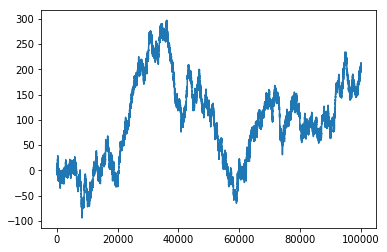

In [29]:
plt.plot(walk[:99999])

In [31]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0 , 1, -1)
walk = steps.cumsum(1)
walk

array([[ 1,  2,  1, ..., 52, 51, 50],
       [ 1,  2,  3, ..., 46, 47, 46],
       [ 1,  0,  1, ..., 40, 41, 42],
       ...,
       [-1,  0,  1, ..., 12, 13, 12],
       [ 1,  0,  1, ..., 64, 65, 66],
       [ 1,  2,  1, ...,  2,  1,  0]])

In [37]:
walk.shape

(5000, 1000)

In [32]:
walk.max()

122

In [33]:
walk.min()

-128

In [34]:
hits30 = (np.abs(walk) >= 30 ).any(1)
hits30

array([ True,  True,  True, ..., False,  True, False])

In [35]:
hits30.sum()

3368

In [38]:
walk[hits30]

array([[  1,   2,   1, ...,  52,  51,  50],
       [  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       ...,
       [  1,   2,   1, ...,  12,  13,  12],
       [  1,   0,  -1, ..., -66, -67, -66],
       [  1,   0,   1, ...,  64,  65,  66]])

In [39]:
walk

array([[ 1,  2,  1, ..., 52, 51, 50],
       [ 1,  2,  3, ..., 46, 47, 46],
       [ 1,  0,  1, ..., 40, 41, 42],
       ...,
       [-1,  0,  1, ..., 12, 13, 12],
       [ 1,  0,  1, ..., 64, 65, 66],
       [ 1,  2,  1, ...,  2,  1,  0]])

In [40]:
crossing_times = (np.abs(walk[hits30]) > 30).argmax(1)
crossing_times.mean()

495.1437054631829

In [41]:
crossing_times

array([714, 136, 398, ...,   0, 410, 302])

In [47]:
val = [5,3,7,2,9,1,10]
np.argmax(val)

6

In [49]:
import pandas as pd
from pandas import Series, DataFrame

In [50]:
obj = pd.Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [52]:
obj.values

array([ 4,  7, -5,  3])

In [53]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [54]:
obj2 = pd.Series([4,7,5,6], index=['a', 'b', 'c', 'd'])

In [55]:
obj2

a    4
b    7
c    5
d    6
dtype: int64

In [56]:
obj2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [57]:
obj2['a']

4

In [58]:
obj2['d'] = 6
obj2[['c', 'a', 'd']]

c    5
a    4
d    6
dtype: int64

In [59]:
obj2[obj2 > 0]

a    4
b    7
c    5
d    6
dtype: int64

In [60]:
np.exp(obj2)

a      54.598150
b    1096.633158
c     148.413159
d     403.428793
dtype: float64

In [61]:
'b' in obj2

True

In [62]:
'e' in obj2

False

In [63]:
sdata = {'ohio' : 35000, 'texas' : 71000, 'oregon': 16000, 'utah': 5000}
obj3 = pd.Series(sdata)
obj3


ohio      35000
texas     71000
oregon    16000
utah       5000
dtype: int64

In [64]:
states = ['califonia', 'ohio', 'oregon', 'texas']
obj4 = pd.Series(sdata, index=states)
obj4

califonia        NaN
ohio         35000.0
oregon       16000.0
texas        71000.0
dtype: float64

In [65]:
pd.notnull(obj4)

califonia    False
ohio          True
oregon        True
texas         True
dtype: bool

In [66]:
obj3+ obj4

califonia         NaN
ohio          70000.0
oregon        32000.0
texas        142000.0
utah              NaN
dtype: float64

In [67]:
data = {'state' : ['ohio', 'ohio', 'ohio', 'nevada', 'nevada', 'nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,ohio,2000,1.5
1,ohio,2001,1.7
2,ohio,2002,3.6
3,nevada,2001,2.4
4,nevada,2002,2.9
5,nevada,2003,3.2


In [68]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,ohio,1.5
1,2001,ohio,1.7
2,2002,ohio,3.6
3,2001,nevada,2.4
4,2002,nevada,2.9
5,2003,nevada,3.2


In [69]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                         index = ['one', 'two', 'three', 'four', 'five', 'six'])
frame2

,year,state,pop,debt
one,2000,ohio,1.5,NaN
two,2001,ohio,1.7,NaN
three,2002,ohio,3.6,NaN
four,2001,nevada,2.4,NaN
five,2002,nevada,2.9,NaN
six,2003,nevada,3.2,NaN


In [70]:
frame2['state']

one        ohio
two        ohio
three      ohio
four     nevada
five     nevada
six      nevada
Name: state, dtype: object

In [71]:
frame2.state

one        ohio
two        ohio
three      ohio
four     nevada
five     nevada
six      nevada
Name: state, dtype: object

In [72]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [73]:
frame2.loc['three']

year     2002
state    ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [74]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,ohio,1.5,16.5
two,2001,ohio,1.7,16.5
three,2002,ohio,3.6,16.5
four,2001,nevada,2.4,16.5
five,2002,nevada,2.9,16.5
six,2003,nevada,3.2,16.5


In [75]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,ohio,1.5,NaN
two,2001,ohio,1.7,-1.2
three,2002,ohio,3.6,NaN
four,2001,nevada,2.4,-1.5
five,2002,nevada,2.9,-1.7
six,2003,nevada,3.2,NaN


In [76]:
frame2['eastern'] = frame2.state = 'ohio'
frame2

,year,state,pop,debt,eastern
one,2000,ohio,1.5,NaN,ohio
two,2001,ohio,1.7,-1.2,ohio
three,2002,ohio,3.6,NaN,ohio
four,2001,ohio,2.4,-1.5,ohio
five,2002,ohio,2.9,-1.7,ohio
six,2003,ohio,3.2,NaN,ohio


In [77]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [82]:
pop = {'nevada': {2001:2.4, 2002:2.9}, 'ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [83]:
frame3 = pd.DataFrame(pop)
frame3

,nevada,ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [84]:
frame3.T

,2001,2002,2000
nevada,2.4,2.9,NaN
ohio,1.7,3.6,1.5


In [85]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,nevada,ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [86]:
pdata = {'ohio': frame3['ohio'][:-1], 'nevada': frame3['nevada'][:2]}
pd.DataFrame(pdata)

,ohio,nevada
2001,1.7,2.4
2002,3.6,2.9


In [89]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,nevada,ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [90]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [91]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [96]:
index[1:]

Index(['b', 'c'], dtype='object')

In [94]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [95]:
obj2 = pd.Series([1.5, -2.5, 0], index = labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [99]:
obj3 = pd.Series(['a', 'b', 'c'], index = labels)
obj3

0    a
1    b
2    c
dtype: object

In [97]:
obj2.index is labels

True

In [98]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')